In [ ]:
!pip install opendatasets

#Dependent libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

In [ ]:
od.download("https://www.kaggle.com/datasets/blastchar/telco-customer-churn")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lasertron
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


100%|██████████| 172k/172k [00:00<00:00, 352MB/s]

In [ ]:
df=pd.read_csv("/content/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Initial Data Overview

In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.duplicated().sum()

np.int64(0)

#Clean TotalCharges column
TotalCharges is the total amount paid by a customer to date.

You'd expect it to be a numeric column (like float64).

In [ ]:
# Convert TotalCharges to string and strip spaces
df['TotalCharges']= df['TotalCharges'].astype(str)
df=df[df['TotalCharges'].str.strip() !='']
# Convert it back to float
df['TotalCharges']= df['TotalCharges'].astype(float)

#Drop unnecessary columns

In [ ]:

df.drop('customerID',axis=1,inplace=True)

#Encode Categorical Features

In [ ]:
le= LabelEncoder()
df['Churn']= le.fit_transform(df['Churn'])

for col in df.select_dtypes(include='object').columns:
  df[col]=le.fit_transform(df[col])


#Define Features and Target

In [ ]:
X=df.drop('Churn', axis=1) #input features
y=df['Churn'] # target label

#Train-Test Split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#train_test_split divides your data into:
#X_train, y_train → used to train the model
#X_test, y_test → used to evaluate how well the model performs on new/unseen data
#test_size=0.2 means 20% of the data goes to testing
#random_state=42 makes sure the split is reproducible

In [ ]:
model=LogisticRegression(max_iter=1000)
#logistic regression is great for binary classification problem like churn(0=no,1=yes)
#max_iter=1000 ensures the algorithm has enough time to converge


In [ ]:
model.fit(X_train,y_train)
#model.fit(X_train, y_train) trains the model on your training data.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

#Evaluate the Model

In [ ]:
y_pred= model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nconfusion matrix:\n",confusion_matrix(y_test,y_pred))
print("\nclassification report:\n",classification_report(y_test,y_pred))

Accuracy: 0.7853589196872779

confusion matrix:
 [[920 113]
 [189 185]]

classification report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



#Visualize & Compare Models

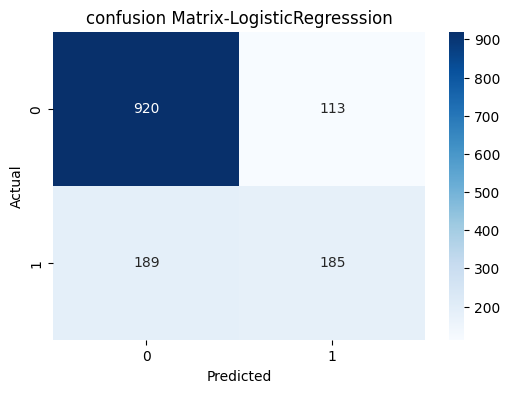

In [ ]:
cm= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion Matrix-LogisticRegresssion")
plt.show()

#Train a Decision Tree

In [ ]:
dt_model= DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

# Predict & Evaluate
y_pred_dt=dt_model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred_dt))

Accuracy: 0.7171286425017769


#Train a Random Forest

In [ ]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)
print("Accuracy randomforest:",accuracy_score(y_test,y_pred_rf))

Accuracy randomforest: 0.7896233120113717


In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.7853589196872779
Decision Tree Accuracy: 0.7171286425017769
Random Forest Accuracy: 0.7896233120113717


#Feature Importance: See which features are influencing churn the most

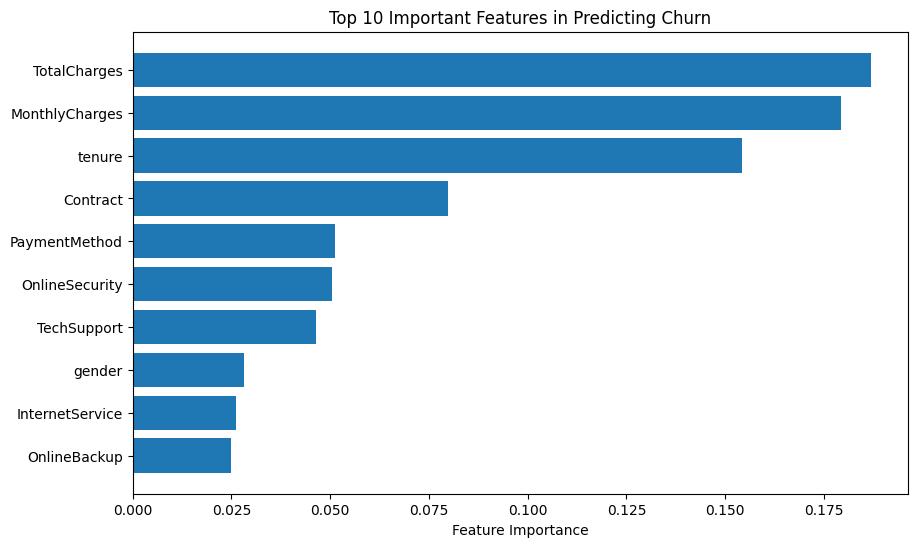

In [ ]:
importances=rf_model.feature_importances_

feature_names=X.columns
feature_importance_df=pd.DataFrame({'feature':feature_names,'Importance':importances}).sort_values(by='Importance',ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['feature'][:10],feature_importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features in Predicting Churn")
plt.xlabel("Feature Importance")
plt.show()

In [ ]:
joblib.dump(rf_model,'churn_model.pk1')#This creates a file named churn_model.pkl — you’ll load this in your Streamlit app later

['churn_model.pk1']